## Setup

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import json
from matplotlib import patches

## Helper Functions

In [84]:
id = 160

# Example usage:
folder_paths = [
    f"../results/graph/llama-2-7b-80k_id_{id}_relevant",
    f"../results/graph/llama-2-7b-80k_id_{id}_irrelevant",
    f"../results/graph/llama-2-7b-80k_id_{id}_relevant_misleading",
    f"../results/graph/llama-2-7b-80k_id_{id}_irrelevant_misleading"
]

titles = [
    f"Relevant ID {id}",
    f"Irrelevant ID {id}",
    f"Misleading in Relevant ID {id}",
    f"Misleading in Irrelevant ID {id}"

]

plot_multiple_heatmaps(folder_paths, titles)

TypeError: plot_multiple_heatmaps() takes 1 positional argument but 2 were given

In [85]:
def load_and_process_data(json_data):
    """Load JSON files from folder and return a pivot table."""
    CONTEXTS = ['irrelevant', 'irrelevant_misleading', 'relevant', 'relevant_misleading']
    data = {context: [] for context in CONTEXTS}
    for context in CONTEXTS:
        context_data = json_data[context]
        for result in context_data:        
            data[context].append({
                "Document Depth": result.get("depth_percent", None),
                "Context Length": result.get("context_length", None),
                "Score": 100.0 if result.get('hallucination_type') == 'Correct Retrieval' else 0.0
            })
        
    dfs = [(k, pd.DataFrame(v)) for k, v in data.items()]
    pivot_tables = []
    for k, df in dfs:
        pivot_table = pd.pivot_table(df, values='Score', index=['Document Depth', 'Context Length'], aggfunc='mean').reset_index()
        pivot_table = pivot_table.pivot(index="Document Depth", columns="Context Length", values="Score")
        pivot_tables.append((k, pivot_table))
    return pivot_tables

In [86]:
def plot_heatmap(pivot_table, title):
    """Plot the heatmap for a given pivot table."""
    cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#F0496E", "#EBB839", "#0CD79F"])
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        pivot_table,
        cmap=cmap,
        cbar_kws={'label': 'Score'},
        vmin=0, vmax=100)
    plt.title(title)
    plt.xlabel('Token Limit')
    plt.ylabel('Depth Percent')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_multiple_heatmaps(file):
    """Given 4 folder paths and titles, plot 4 heatmaps inline."""
    with open(file, "r") as f:
            data = json.load(f)

    pivot_tables = load_and_process_data(data)
    plt.figure(figsize=(14, 14))

    for i, (title, data) in enumerate(pivot_tables, 1):
        
        plt.subplot(2, 2, i)
        sns.heatmap(
            data,
            cmap=sns.color_palette(["#F0496E", "#0CD79F"]),
            cbar=False,
            vmin=0, 
            vmax=1,
            square=True,
            linewidths=1.5,             
            linecolor='white')
        
        # Add a custom legend
        legend_labels = ['No Hallucination', 'Hallucination']
        colors = ['#0CD79F', '#F0496E']

        # Create legend patches
        patches_list = [patches.Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
        plt.legend(handles=patches_list, loc='upper left')
        plt.title(title)
        plt.xlabel('Token Limit')
        plt.ylabel('Depth Percent')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
    
    
    plt.tight_layout()
    plt.show()

## Generate Visualisation

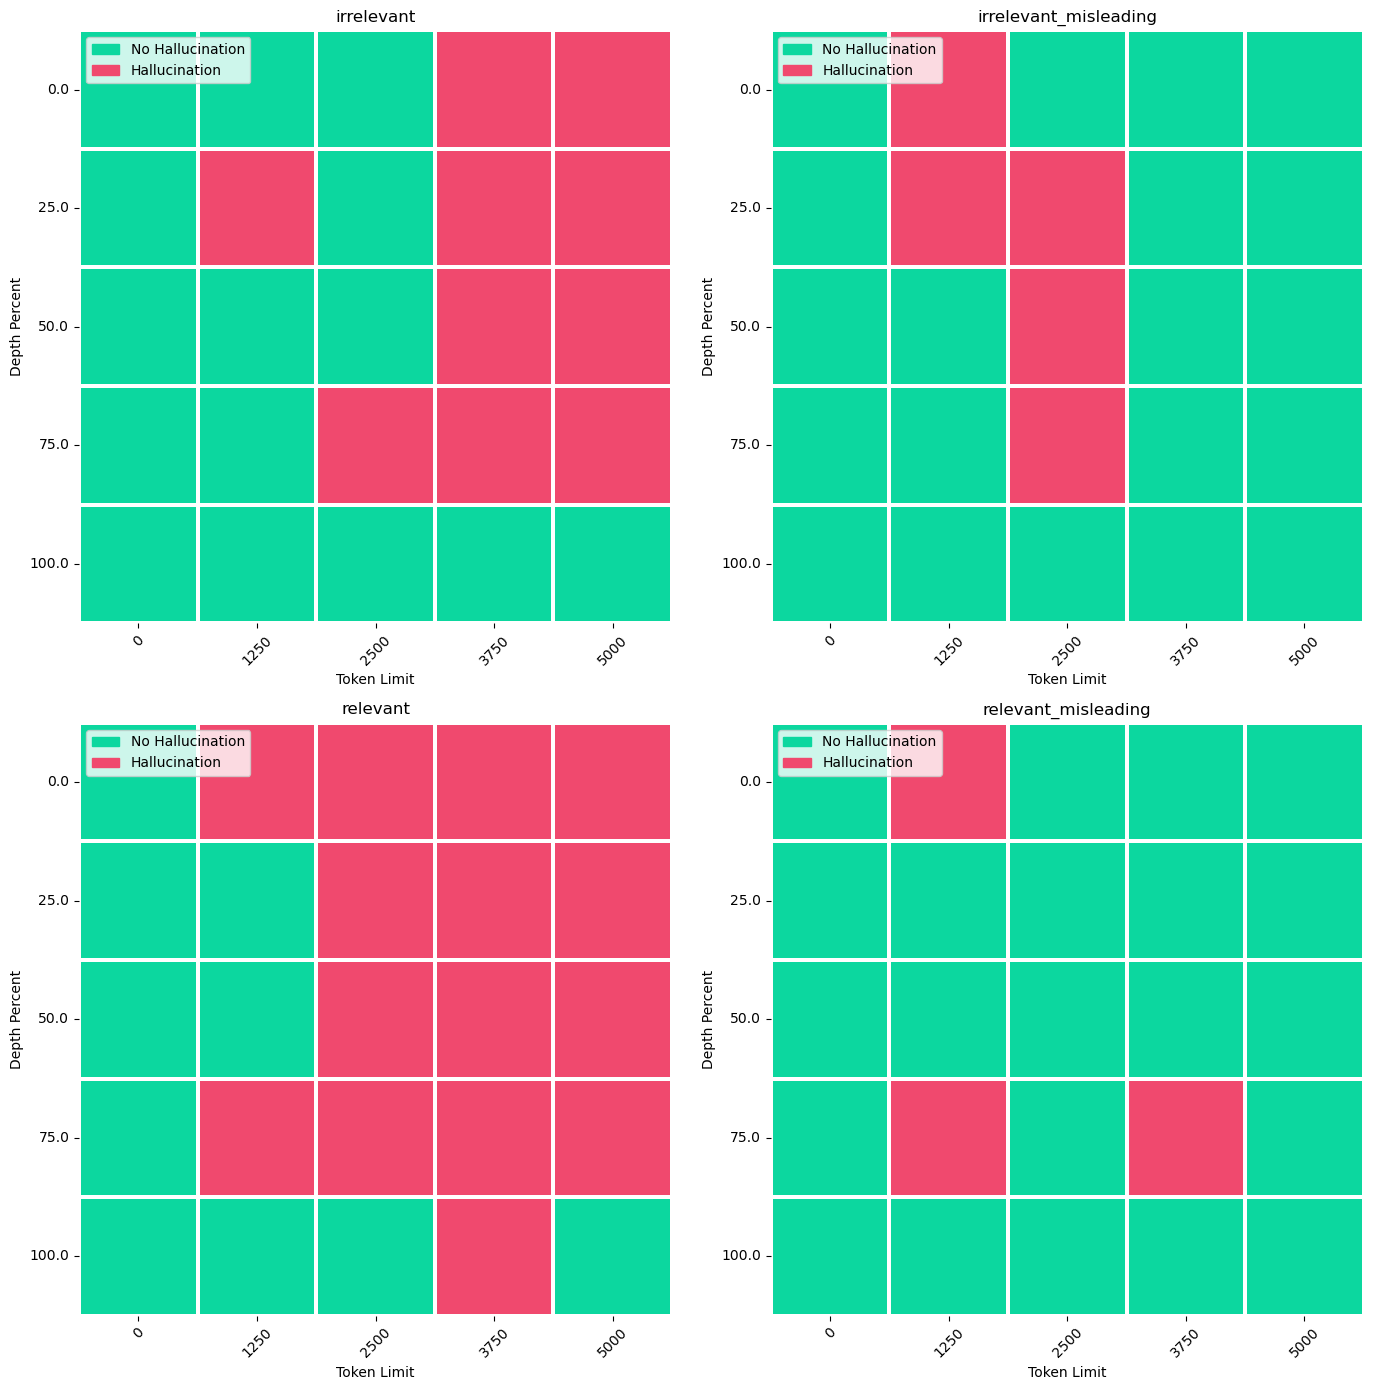

In [97]:
id = 44

file = f"./updated_unique_responses/{id}.json"


plot_multiple_heatmaps(file)